<a href="https://colab.research.google.com/github/IvRodco/EstadisticaAplicasa_1899843/blob/main/Sesion15_G41_25sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadistica Aplicada
##Sesion 15, 25 de septiembre

###Ivanna Lizeth Rodriguez Ambriz

###1899843

####Grupo 41

In [1]:
#Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Librerias especializadas
from statsmodels.tsa.seasonal import seasonal_decompose

## Tamaño gráficas (largo, alto) en pulgadas
plt.rcParams['figure.figsize'] =(10,6)

In [3]:
# Formato de fecha: YYYY-MM-DD
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
pasajeros = pasajeros.rename(columns={'Thousands of Passengers':'Miles de pasajeros'})

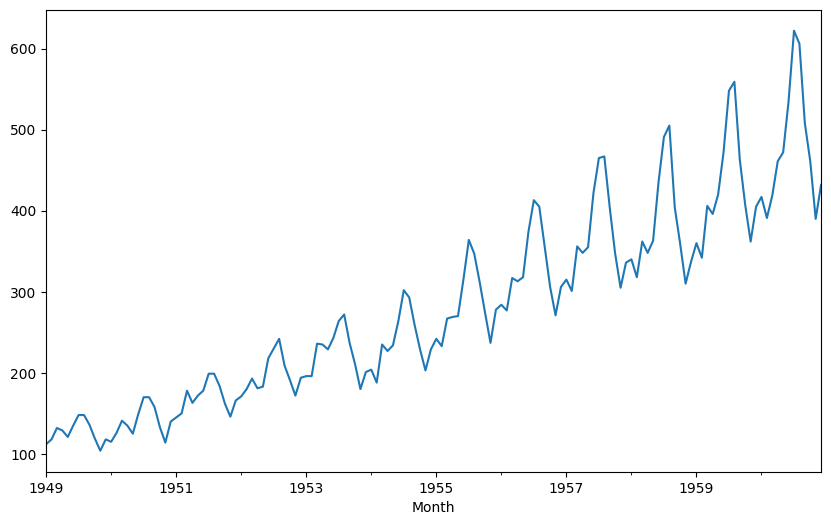

In [6]:
pasajeros['Miles de pasajeros'].plot();

Formato fecha y mensual


Para hacer zoom, plt.xlim('1949-01','1949-06')


Esta serie tiene tendencia positiva (creciente) y un marcado componente estacional

Aditiva -> Yt  = Tendencia + ciclo + estacional + irregular

Multiplicativa -> Yt = T * C * S * I

Si se va abriendo es multiplicativa.  

Si va para arriba es aditiva.

In [12]:
##Vamos a descomner la serie en 3 elementos
# 1 Tendencia ciclo
# 2 Estacional
# 3 Irregular

ets1 = seasonal_decompose(pasajeros['Miles de pasajeros'], model='mult')

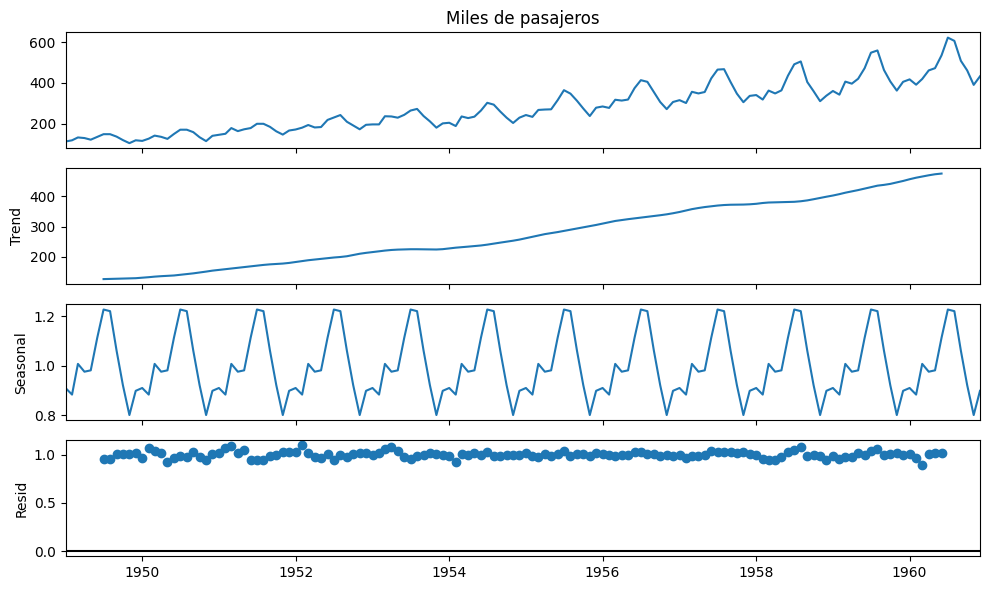

In [13]:
ets1.plot();

Nos grafica:
1. original
2. ciclo
3. estacional
4. irregular

In [14]:
#estacional muestra los 12 meses
ets1.seasonal.head(12)

#Cuando los valores esta arriba de uno crece en esos meses y cuando estan debajo de uno siempre decrece

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Name: seasonal, dtype: float64

In [16]:
ets1.trend.head();

In [18]:
#Estacional
ets1.resid.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: resid, dtype: float64

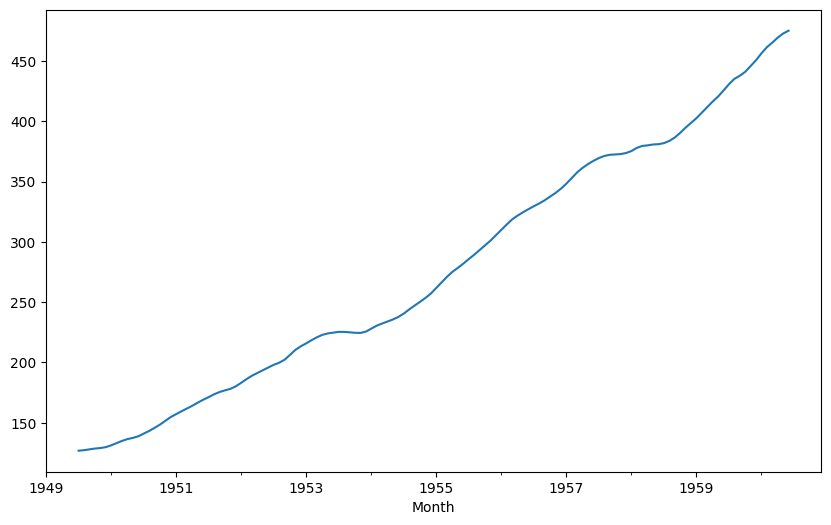

In [19]:
#Graficamos con pandas la tendencia ciclo
ets1.trend.plot();

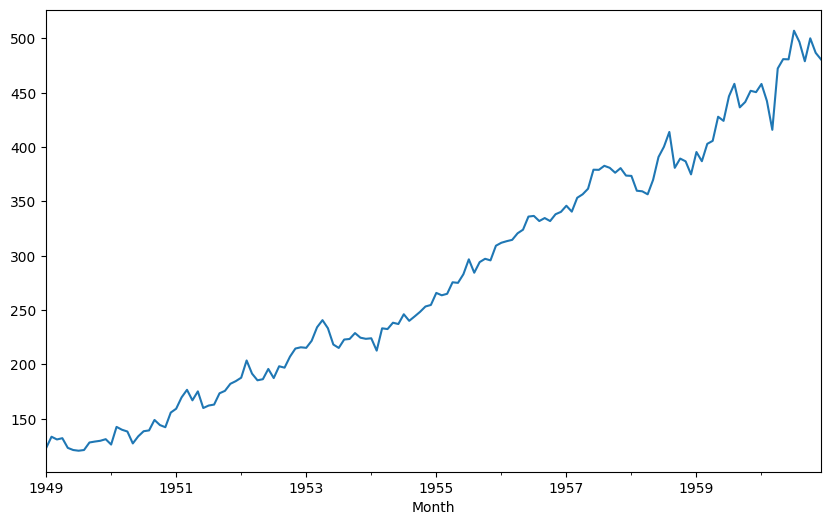

In [21]:
#desestacionalizar la serie (quitar el componente estacionario)
pasajeros['desestacionalizada']=pasajeros['Miles de pasajeros']/ets1.seasonal

#graficamos
pasajeros['desestacionalizada'].plot();

In [22]:
#mandamos la base a un excel
pasajeros.to_excel('pasajeros.xlsx')

#En el excel cambiamos a fecha corta con formato mes y año
#despues calculamos el promedio movil a partir del mes 6
#en el sexto mes calculamos el promedio de los 6 meses anteriores y se corre la formula
#graficamos el promedio movil a 6 meses

#despues calculamos el promedio movil a 12 meses
#calculamos el promedio a partir del mes 12 y luego corremos la formula
#Graficamos est este grafico tenemos la z y sigma

#ahora con el promedio movil centrado
#tiene que ser un numero impar
#puede serpromedio movil de 3 meses y es en el mes de el centro
#entonces ponemos el promedio en el mes de el centro y arrastamos la formula

#promedio movil centrado de 11 meses
#esta centrado en el mes 6 para que haya cinco meses antes y cinco despues
#hacemos el promedio y arrastamos la formula
#con este nos traemos la tendencia y el ciclo de la serie



In [23]:
from google.colab import files

files.download('pasajeros.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>